In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Load the image

In [24]:
img = cv2.imread("images/Typical_New_Zealand_scenic_walk_view.jpg")
img

array([[[196, 173, 171],
        [149, 127, 122],
        [205, 185, 180],
        ...,
        [254, 253, 255],
        [254, 253, 255],
        [254, 253, 255]],

       [[139, 118, 116],
        [131, 111, 106],
        [164, 145, 140],
        ...,
        [254, 253, 255],
        [254, 253, 255],
        [254, 253, 255]],

       [[123, 106, 103],
        [193, 177, 171],
        [195, 181, 175],
        ...,
        [254, 253, 255],
        [254, 253, 255],
        [254, 253, 255]],

       ...,

       [[ 81,  92,  89],
        [ 54,  66,  60],
        [ 61,  73,  67],
        ...,
        [ 87,  90,  98],
        [100,  99, 108],
        [ 93,  93,  99]],

       [[ 62,  71,  68],
        [ 44,  55,  52],
        [ 56,  67,  64],
        ...,
        [ 86,  88,  98],
        [ 86,  88,  96],
        [ 85,  88,  93]],

       [[ 31,  37,  36],
        [ 20,  29,  26],
        [ 41,  50,  47],
        ...,
        [ 89,  91, 101],
        [ 80,  82,  92],
        [ 81,  84,  92]]

In [25]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Step 2: Contrast Enhancement using Histogram Equalization (on V channel)

In [26]:
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

In [28]:
v_eq = cv2.equalizeHist(v)
hsv_contrast = cv2.merge([h, s, v_eq])
contrast_img = cv2.cvtColor(hsv_contrast, cv2.COLOR_HSV2RGB)

## Step 3: Saturation Enhancement (boost S channel)

In [ ]:
factor = 1.5 
s_boosted = np.clip(s.astype(np.float32) * factor, 0, 255).astype(np.uint8)
hsv_sat = cv2.merge([h, s_boosted, v])
saturation_img = cv2.cvtColor(hsv_sat, cv2.COLOR_HSV2RGB)

## Step 4: Plot comparison

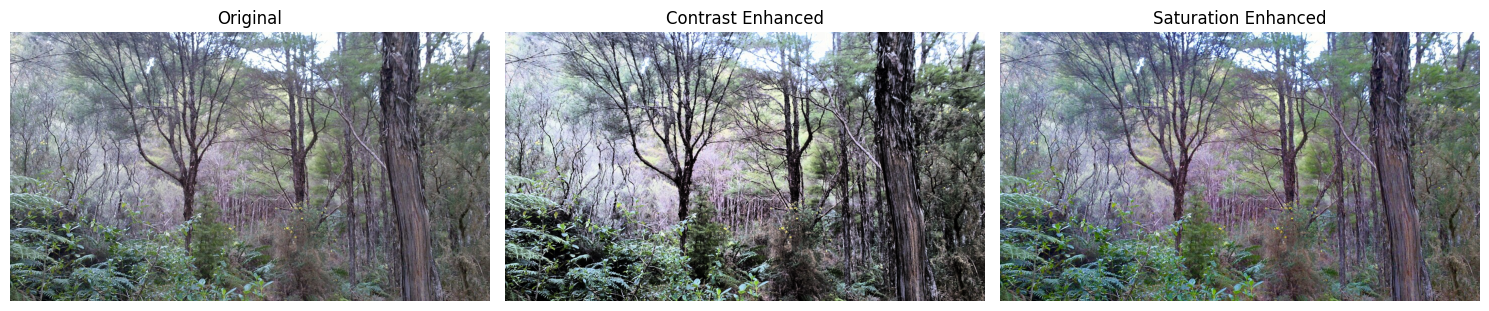

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(contrast_img)
plt.title("Contrast Enhanced")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(saturation_img)
plt.title("Saturation Enhanced")
plt.axis("off")

plt.tight_layout()
plt.show()

## Step 5: Save outputs

In [31]:
cv2.imwrite("landscape_contrast.png", cv2.cvtColor(contrast_img, cv2.COLOR_RGB2BGR))
cv2.imwrite("landscape_saturation.png", cv2.cvtColor(saturation_img, cv2.COLOR_RGB2BGR))

True